# HW 10 (Bonus 5 points)
The goal of this HW is to select the best model that can fit our data. We first generate a set of data. Here you can actually cheat and see how the data is generated. So you already know what your final answer should be. But This problem wants your to actually find the best model by using a systematic approach in finding the best model.

# we generate the entire data set here.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)
N = 1000
b = 0
a4 =-0.009
a3 = .05
a2 = .01
a1 = 1
x = np.random.normal(0, 3, N)
p = 4
X = np.ones(N)
for i in np.arange(p):
  X = np.vstack((X, np.power(x , i+1)))
w = np.array([b, a1, a2, a3, a4])
y = np.matmul(w,X) + np.random.normal(0, 10, N)

**We set aside 50% of the data for test**


Text(0.5, 1.0, 'training and test data ')

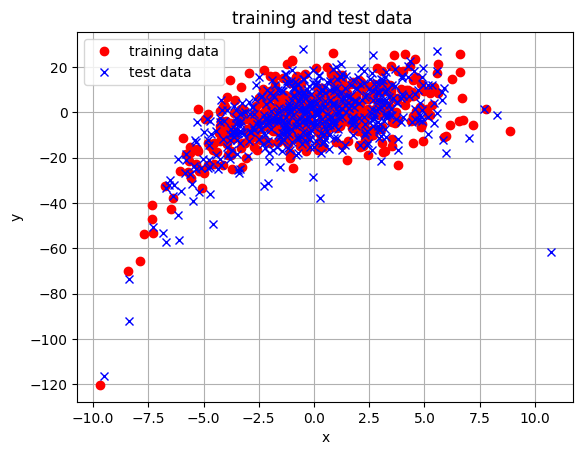

In [ ]:
N_tr = int(N*0.5)
N_tst = N-N_tr
x_tr = x[0:N_tr]
y_tr = y[0:N_tr]
x_tst= x[N_tr:]
y_tst = y[N_tr:]
plt.plot(x_tr,y_tr, 'ro', label='training data')
plt.plot(x_tst,y_tst, 'bx', label='test data')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('training and test data ')

# Problem 1 (2 points)

Using the data set that is generated above solve the nonlinear regression for polynomial degrees from 1 to 12. Then plot the training error and test error as a function of the degree of the polynomial in your model.

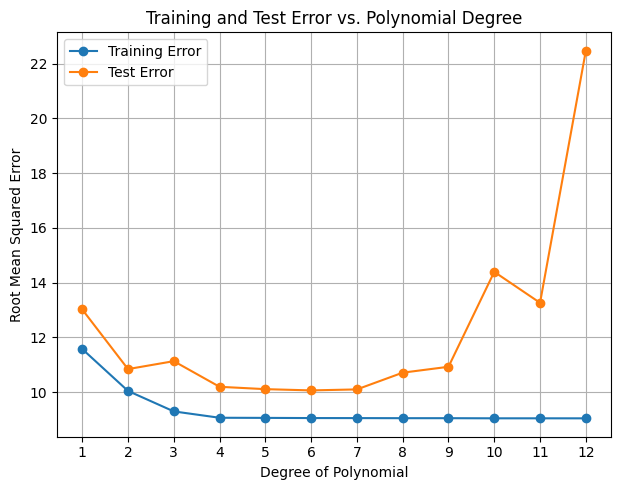

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

degrees = np.arange(1, 13)
train_errors = []
test_errors = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_tr_poly = poly_features.fit_transform(x_tr.reshape(-1, 1))
    X_tst_poly = poly_features.transform(x_tst.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X_tr_poly, y_tr)

    y_tr_pred = model.predict(X_tr_poly)
    train_error = mean_squared_error(y_tr, y_tr_pred)
    train_errors.append(train_error)

    y_tst_pred = model.predict(X_tst_poly)
    test_error = mean_squared_error(y_tst, y_tst_pred)
    test_errors.append(test_error)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(degrees, np.sqrt(train_errors), label='Training Error',marker='o')
plt.plot(degrees, np.sqrt(test_errors), label='Test Error',marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Root Mean Squared Error')
plt.title('Training and Test Error vs. Polynomial Degree')
plt.legend()
plt.grid()
plt.xticks(np.arange(1, 13, 1))
plt.tight_layout()
plt.show()

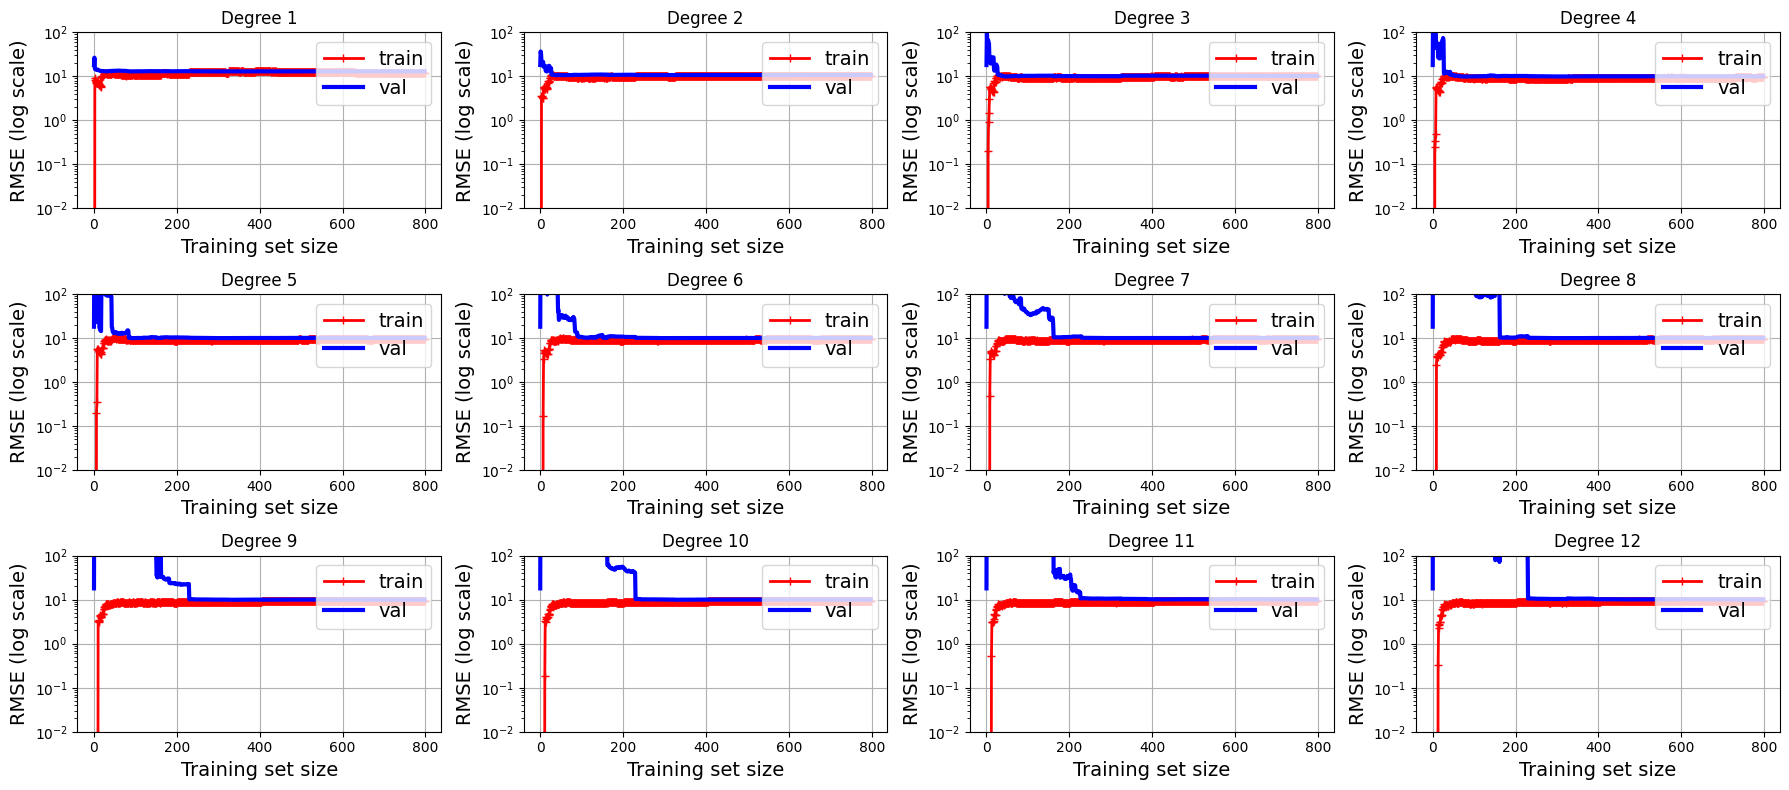

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Function to plot learning curves
def plot_learning_curves(model, X, y, axis):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    axis.semilogy(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    axis.semilogy(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    axis.legend(loc="upper right", fontsize=14)
    axis.set_xlabel("Training set size", fontsize=14)
    axis.set_ylabel("RMSE (log scale)", fontsize=14)
    axis.set_ylim([1e-2, 1e2])

# Degrees of polynomial to be tested
degrees = np.arange(1, 13)

# Determine subplot layout
num_rows = int(np.ceil(len(degrees) / 4))
num_cols = min(len(degrees), 4)

plt.figure(figsize=(18, 8))
for i, degree in enumerate(degrees, 1):
    plt.subplot(num_rows, num_cols, i)
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(x.reshape(-1, 1))
    lin_reg = LinearRegression()
    plot_learning_curves(lin_reg, X_poly, y, plt.gca())
    plt.title(f"Degree {degree}")
    plt.grid(True)

plt.tight_layout()
plt.show()

# Problem 2 (1 point)

Use your plot to identify the high variance and the high bias area.

## High Variance:
Training error is significantly lower than the test error. It fits the training data well but not the test data. This is happening in degree 8,9,10,11 and 12. The test error is significantly high compared to the training error in degree 8-12. The highest variance is at degree 12.


##High Bias:
Both training and test errors are high and not improving significantly. It does not fit neither the training data or the test data well enough. This is happening in degree 1,2 and 3. The highest bias is at degree 1.


Best Model with a balanced variance and bias is at degree 4, 5, 6 and 7.


# Problem 3 (1 point)

What polynomial degree do you use for modeling the data? We all know 4 is the correct one but you need to give a reasonable answer justifying your answer as if you did not know how the data was generated.

I would use the polynomial degree 4. If we take degree 1 to 3, both the train and test mse are high, it means both the train and test data is not fitting well. This is the underfitting case.This case has high bias. On the otherhand, if we consider the degree from 8 to 12 the testing mse starts increasing. This is the overfitting case. This case has high variance. When we consider degree from 4 to 8, the train and test mse are in horizontal lines, means the data is fitting well at these degree. This degree is the lowest degree polynomial that has a balanced varaince and bias, means without underfitting or overfitting. Since we want to choose the model with the lowest complexity which fits both the training and testing data well, we choose model with degree 4.



# Problem 4 (1 point)

The test error does not get close to zero even for the best polynomial coice. Please give a reason for this.



If the test error does not get close to zero even for the best polynomial choice, it indicates that the model is not able to generalize well to unseen data. There may be multiple reasons. One is due to the presence of noise and complex underlying patterns in the data. Two, they might not have enough data to learn from. Hence, there is no possible polynomial model that may fit the data perfectly and there will always be some error.



